In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NFRF ML/ElectionTweetMLData.csv')
df

,Unnamed: 0,Subjectivity,Polarity,Sentiment
0,0,0.000000,0.000000,0
1,1,0.000000,0.000000,0
2,2,0.350000,-0.100000,1
3,3,0.100000,0.100000,2
4,4,1.000000,-0.500000,1
...,...,...,...,...
3041,3041,0.000000,0.000000,0
3042,3042,0.335714,0.037500,1
3043,3043,0.500000,0.500000,2
3044,3044,0.500000,0.333333,2


In [4]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)
df2

,Subjectivity,Polarity,Sentiment
0,0.000000,0.000000,0
1,0.000000,0.000000,0
2,0.350000,-0.100000,1
3,0.100000,0.100000,2
4,1.000000,-0.500000,1
...,...,...,...
3041,0.000000,0.000000,0
3042,0.335714,0.037500,1
3043,0.500000,0.500000,2
3044,0.500000,0.333333,2


In [5]:
X=df2.iloc[:,:2].values
X

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.35      , -0.1       ],
       ...,
       [ 0.5       ,  0.5       ],
       [ 0.5       ,  0.33333333],
       [ 0.4875    ,  0.075     ]])

In [6]:
Y=df2.iloc[:,2:].values
Y

array([[0],
       [0],
       [1],
       ...,
       [2],
       [2],
       [2]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier()
model.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [9]:
y_pred = model.predict(X_test)

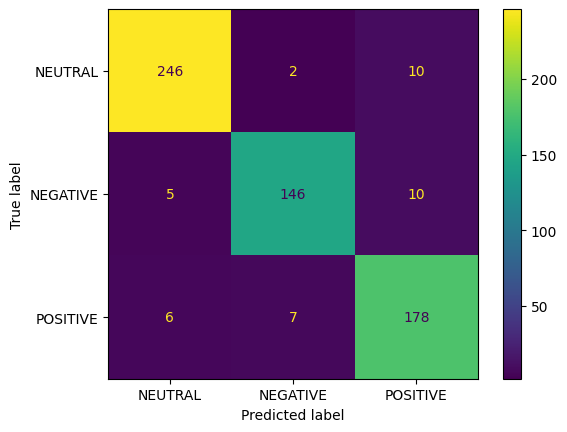

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NEUTRAL', 'NEGATIVE', 'POSITIVE'])
disp.plot()
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       258
           1       0.94      0.91      0.92       161
           2       0.90      0.93      0.92       191

    accuracy                           0.93       610
   macro avg       0.93      0.93      0.93       610
weighted avg       0.93      0.93      0.93       610

